<a href="https://colab.research.google.com/github/khyatidahiya/TECHINCAL_TRAINING_ASSIGNMENTS/blob/main/EDA_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* write a program which uses seaborn to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 3: Visualization

## How do I use pandas to plot?

Pandas has a `.plot` which you configure using its arguments (eg., `kind=hist`), this however *just uses* seaborn. 

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()



Saving titanic2.csv to titanic2.csv


In [3]:
import pandas as pd
import io
 
ti = pd.read_csv(io.BytesIO(uploaded['titanic2.csv']))
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


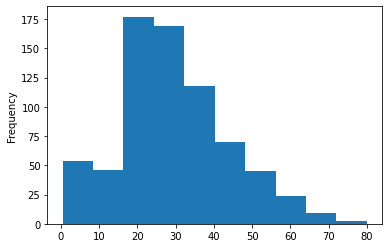

In [4]:
ti['age'].plot(kind='hist');


Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn. 

## How do I use seaborn to visualize data?

In [5]:
import seaborn as sns


### Checks for emptiness and cleanse data

In [6]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [8]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

There are two ways of using seaborn, you can either

* supply x (, y, etc.) as individual arguments
* OR: supply a *dataframe* and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


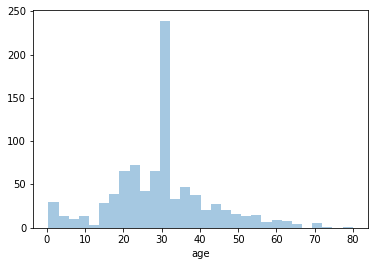

In [9]:
sns.distplot(ti['age'], kde=False);


##### What is the kde?

* approximation of the distribution using a linear combination of normal distributions

* further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


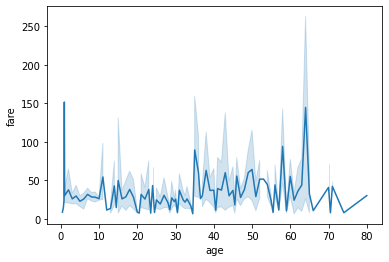

In [10]:
sns.lineplot(ti['age'], ti['fare'])


## How do I use a dataframe with seaborn?

We set `data` to be the dataframe, and *name the columns* for `x` and `y`... 

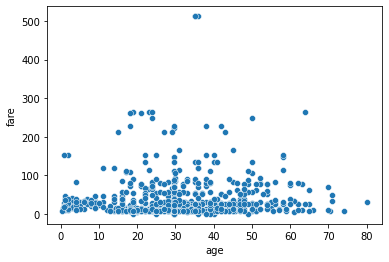

In [11]:
sns.scatterplot(data=ti, x='age', y='fare')


## How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


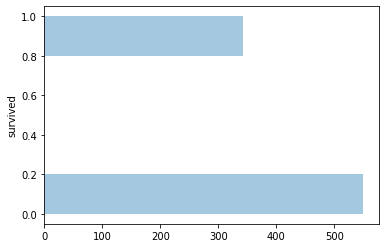

In [12]:
sns.distplot(ti['survived'], vertical=True, kde=False)


## How do I create a violin plot?

The width of a violin plot is the frequency (ie., how common) a value is within some column... 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


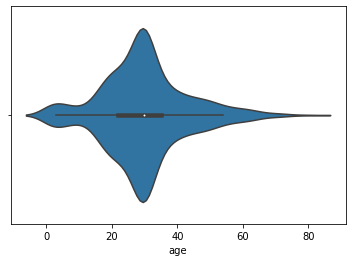

In [13]:
sns.violinplot(ti['age'])


## How do I create a box plot?

Box plots show quarties (25th, 50th, 75th) and outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


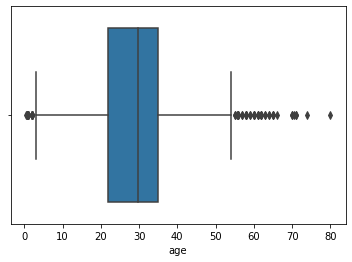

In [14]:
sns.boxplot(ti['age'])


## How do I create a violin plot for multiple columns?

A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

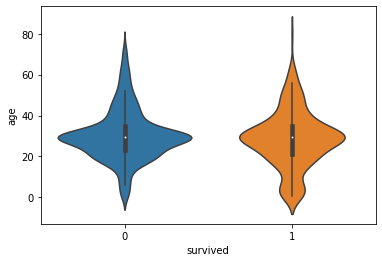

In [15]:
sns.violinplot(data=ti, x='survived', y='age')


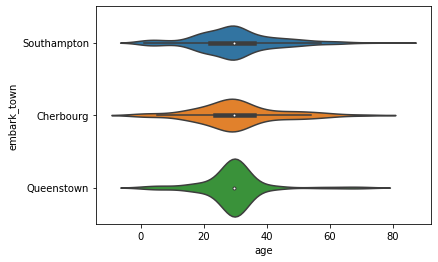

In [16]:
sns.violinplot(data=ti, x="age", y='embark_town')

## How do I create a bar plor for multiple columns?

Bar plots are useful for discrete data or for showing, here, the means:

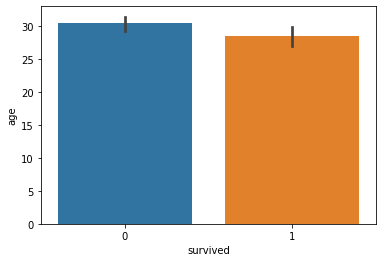

In [17]:
sns.barplot(data=ti, x='survived', y='age');


## How do I create a line plot?

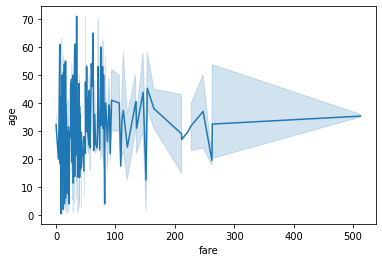

In [18]:
sns.lineplot(data=ti, x='fare', y='age');


###### NB: would creating a scatter plot be more appropriate?

## How do I create a scatter plot?

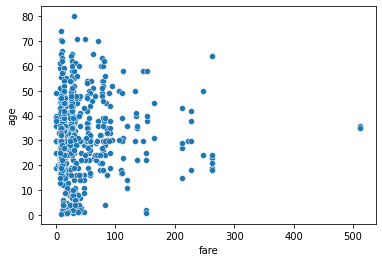

In [19]:
sns.scatterplot(data=ti, x='fare', y='age');


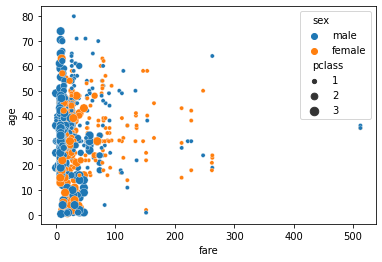

In [20]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

### EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use `df.to_csv()` to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

## Exercise (30 min)

## Step 1 (5 min)
* review seaborn individual, try a few plots

In [23]:
ti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

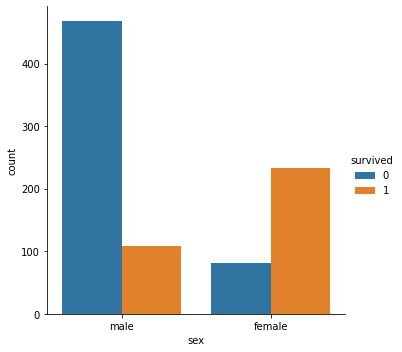

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = ti)

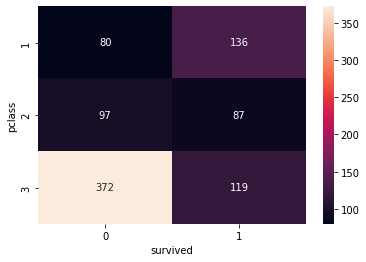

In [26]:
# Group the dataset by Pclass and Survived and then unstack them
group = ti.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

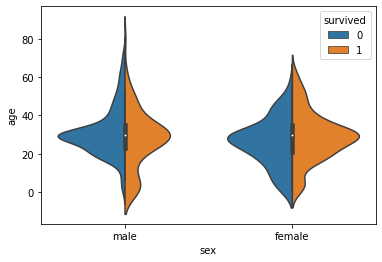

In [27]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = ti, split = True)

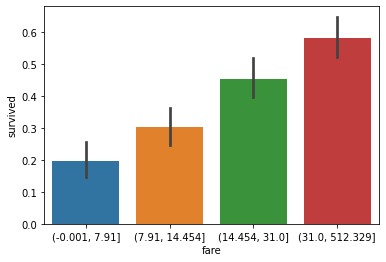

In [28]:
# Divide Fare into 4 bins
ti['fare'] = pd.qcut(ti['fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='fare', y ='survived',
data = ti)

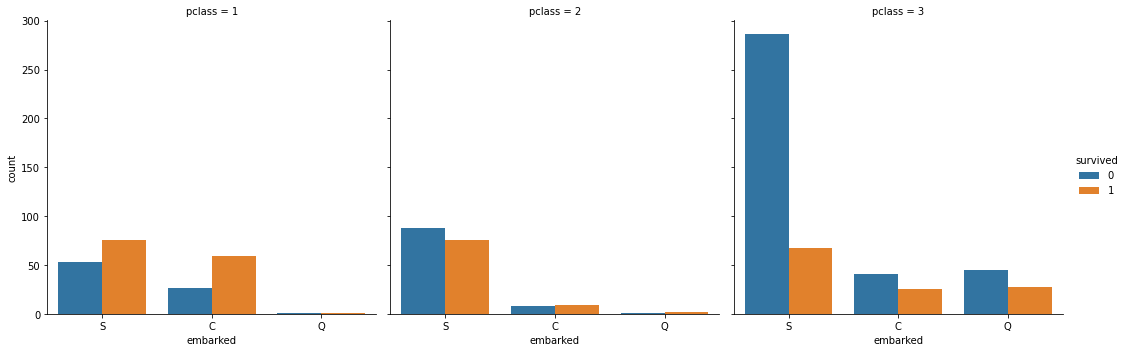

In [29]:
sns.catplot(x ='embarked', hue ='survived',
kind ='count', col ='pclass', data = ti)

## Step 2 (25 min)

* What affected your chances of survival on the titanic?
    * brainstorm & execute an analysis of the titanic dataset
* Consider:
    * old vs. young
    * women vs. men
    * women & children vs. men
    * cheaper vs. expensive tickets
    * deck
    * class
    * ...location...
* Use seaborn plots (and pandas) to obtain helpful visuals which answer the investigatory question. 

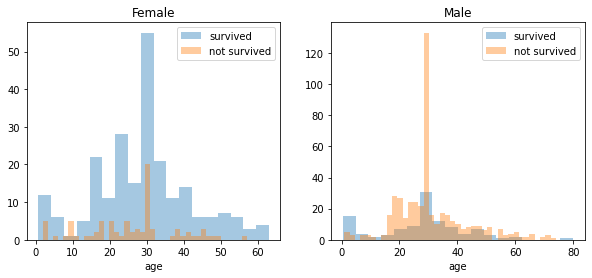

In [33]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = ti[ti['sex']=='female']
men = ti[ti['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


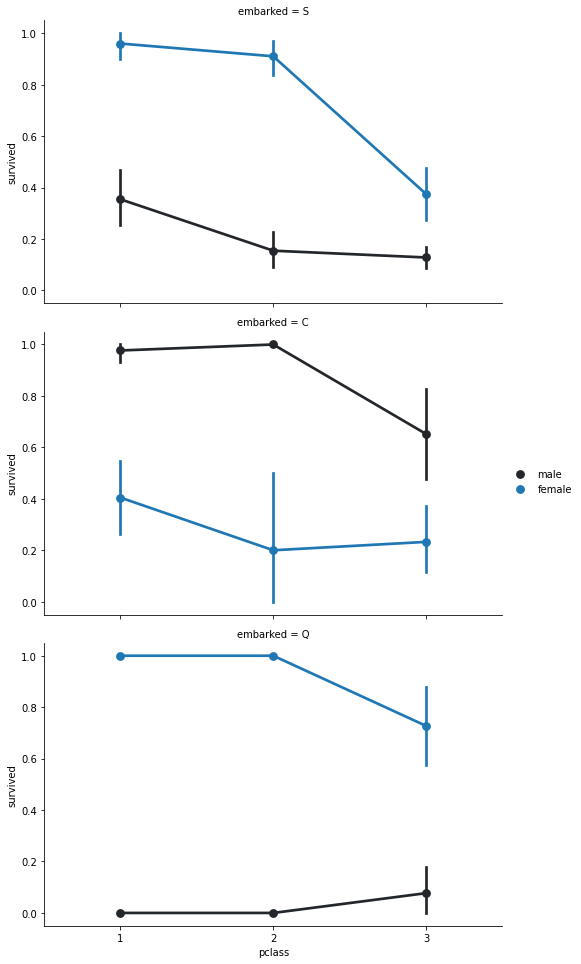

In [34]:
FacetGrid = sns.FacetGrid(ti, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.


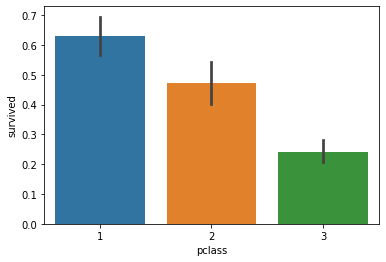

In [35]:
sns.barplot(x='pclass', y='survived', data=ti)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


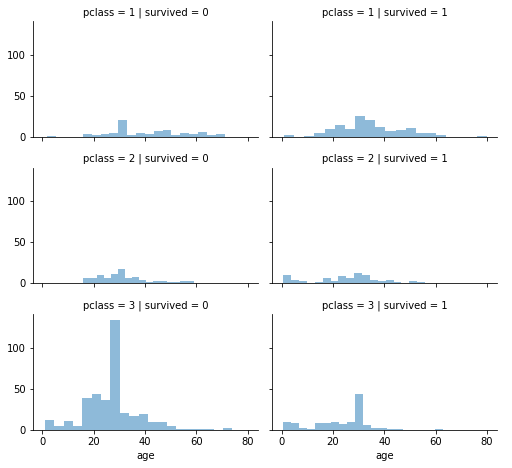

In [36]:
grid = sns.FacetGrid(ti, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [37]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,"(-0.001, 7.91]",S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,"(31.0, 512.329]",C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,"(7.91, 14.454]",S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,"(31.0, 512.329]",S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,"(7.91, 14.454]",S,Third,man,True,C,Southampton,no,True


### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

* Multivariate (here: 2-col) plots
    * sns.violinplot
        * age by survived
        * fare by survived
    * sns.lineplot
        * fare vs. age
    * sns.scatterplot
        * age vs. fare

ti[["age","sex"]].groupby(ti.age>18).sum()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


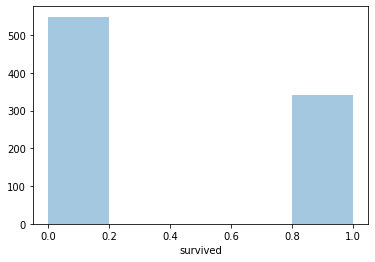

In [39]:
sns.distplot(ti['survived'], kde=False);


In [48]:
tf=pd.read_csv(io.BytesIO(uploaded['titanic2.csv']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


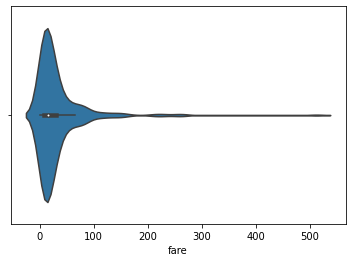

In [49]:
sns.violinplot(tf['fare'])

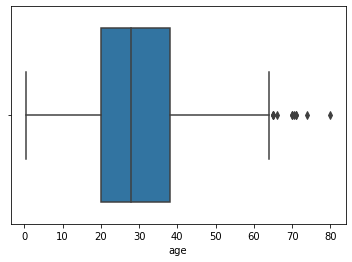

In [51]:
sns.boxplot(tf['age'])

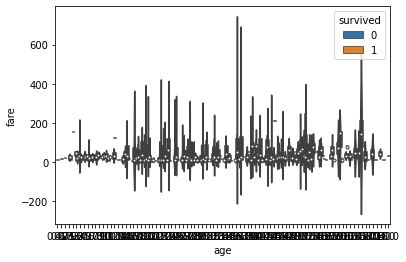

In [55]:
sns.violinplot(x=tf['age'],y=tf['fare'],hue=tf['survived'])

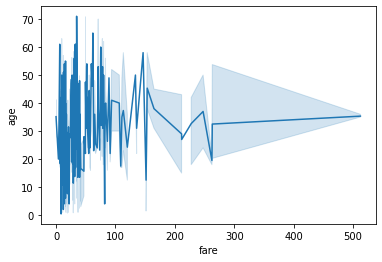

In [56]:
sns.lineplot(x=tf['fare'],y=tf['age'])

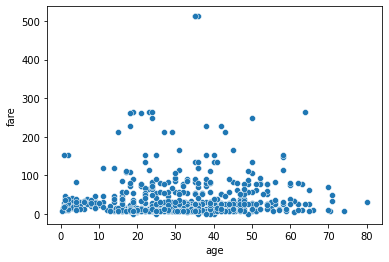

In [57]:
sns.scatterplot(x=tf['age'],y=tf['fare'])